In [100]:
import pandas as pd
import glob 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sqlalchemy import create_engine
from sklearn.impute import KNNImputer

In [4]:
df = pd.read_excel('Desktop/Новая папка/Рассеянный склероз_ДСМ.xlsx') 
df

,Тип товара,Полное наименование,МНН,Лекарственная форма,Бренд,Фирма-производитель,Корпорация,Фармакотерапевтическая группа,АТС1,АТС2,...,АТС5,Ephmra1,Ephmra2,Ephmra3,Ephmra4,Год,Месяц,"Объем (цена розн.-уп.розн.), рубли","Объем (розница), упак.","Объем (цена опт.-уп.розн.), рубли"
0,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2018,4,1687765,1466,1461669
1,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2018,11,4113360,3583,3654360
2,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2019,10,5379427,4575,4526456
3,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2020,8,4351684,3039,3750294
4,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2020,10,3715400,2546,3267094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛАЙФФЕРОН РАСТ Д/В/М СУБКОНЪЮНКТ ВВЕД И ЗАКАП ...,ИНТЕРФЕРОН АЛЬФА-2B,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО СУБКОНЪЮНКТИВАЛЬНО...,ЛАЙФФЕРОН,ВЕКТОР-МЕДИКА АО,ВЕКТОР-МЕДИКА АО,ЦИТОКИН,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОМОДУЛЯТОРЫ (L03),...,ИНТЕРФЕРОН АЛЬФА2B (L03AB05),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ИММУНОСТИМУЛЯТОРЫ (L03),ИНТЕРФЕРОНЫ (L03B),"ИНТЕРФЕРОНЫ, АЛЬФА (L03B1)",2022,8,16756,6,16756
3306,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛАЙФФЕРОН РАСТ Д/В/М СУБКОНЪЮНКТ ВВЕД И ЗАКАП ...,ИНТЕРФЕРОН АЛЬФА-2B,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО СУБКОНЪЮНКТИВАЛЬНО...,ЛАЙФФЕРОН,ВЕКТОР-МЕДИКА АО,ВЕКТОР-МЕДИКА АО,ЦИТОКИН,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОМОДУЛЯТОРЫ (L03),...,ИНТЕРФЕРОН АЛЬФА2B (L03AB05),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ИММУНОСТИМУЛЯТОРЫ (L03),ИНТЕРФЕРОНЫ (L03B),"ИНТЕРФЕРОНЫ, АЛЬФА (L03B1)",2022,11,124854,64,124854
3307,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛАЙФФЕРОН РАСТ Д/В/М СУБКОНЪЮНКТ ВВЕД И ЗАКАП ...,ИНТЕРФЕРОН АЛЬФА-2B,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО СУБКОНЪЮНКТИВАЛЬНО...,ЛАЙФФЕРОН,ВЕКТОР-МЕДИКА АО,ВЕКТОР-МЕДИКА АО,ЦИТОКИН,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОМОДУЛЯТОРЫ (L03),...,ИНТЕРФЕРОН АЛЬФА2B (L03AB05),ПРОТИВООПУХОЛЕВЫЕ И ИММУНО

In [10]:
# Подключиться к базе данных SQLite
conn = sqlite3.connect('Desktop/Новая папка/database.sqlite3')
c = conn.cursor()

# Создать таблицу для хранения данных Excel
c.execute( '''CREATE TABLE IF NOT EXISTS analytics(
      id INTEGER PRIMARY KEY AUTOINCREMENT,
      Тип товара TEXT,
      Полное наименование TEXT,
      МНН TEXT,
      Лекарственная форма TEXT,
      Бренд TEXT,
      Фирма_производитель TEXT,
      Корпорация TEXT,
      Фармакотерапевтическая группа TEXT,
      АТС1 TEXT,
      АТС2 TEXT,
      АТС3 TEXT,
      АТС4 TEXT,
      АТС5 TEXT,
      Ephmra1 TEXT,
      Ephmra2 TEXT,
      Ephmra3 TEXT,
      Ephmra4 TEXT,
      Год INTEGER,
      Месяц INTEGER,
      Объем1 INTEGER,
      Объем2 INTEGER,
      Объем3 INTEGER)''')

# Вставить данные из DataFrame в таблицу
df.to_sql('analytics', conn, if_exists='replace', index=True)

# Зафиксировать изменения 
conn.commit()
conn.close()

In [14]:
#Профилирование данных
df = pd.read_excel('Desktop/Новая папка/Рассеянный склероз_ДСМ.xlsx')
df

,Тип товара,Полное наименование,МНН,Лекарственная форма,Бренд,Фирма-производитель,Корпорация,Фармакотерапевтическая группа,АТС1,АТС2,...,АТС5,Ephmra1,Ephmra2,Ephmra3,Ephmra4,Год,Месяц,"Объем (цена розн.-уп.розн.), рубли","Объем (розница), упак.","Объем (цена опт.-уп.розн.), рубли"
0,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2018,4,1687765,1466,1461669
1,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2018,11,4113360,3583,3654360
2,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2019,10,5379427,4575,4526456
3,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2020,8,4351684,3039,3750294
4,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2020,10,3715400,2546,3267094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛАЙФФЕРОН РАСТ Д/В/М СУБКОНЪЮНКТ ВВЕД И ЗАКАП ...,ИНТЕРФЕРОН АЛЬФА-2B,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО СУБКОНЪЮНКТИВАЛЬНО...,ЛАЙФФЕРОН,ВЕКТОР-МЕДИКА АО,ВЕКТОР-МЕДИКА АО,ЦИТОКИН,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОМОДУЛЯТОРЫ (L03),...,ИНТЕРФЕРОН АЛЬФА2B (L03AB05),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ИММУНОСТИМУЛЯТОРЫ (L03),ИНТЕРФЕРОНЫ (L03B),"ИНТЕРФЕРОНЫ, АЛЬФА (L03B1)",2022,8,16756,6,16756
3306,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛАЙФФЕРОН РАСТ Д/В/М СУБКОНЪЮНКТ ВВЕД И ЗАКАП ...,ИНТЕРФЕРОН АЛЬФА-2B,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО СУБКОНЪЮНКТИВАЛЬНО...,ЛАЙФФЕРОН,ВЕКТОР-МЕДИКА АО,ВЕКТОР-МЕДИКА АО,ЦИТОКИН,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОМОДУЛЯТОРЫ (L03),...,ИНТЕРФЕРОН АЛЬФА2B (L03AB05),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ИММУНОСТИМУЛЯТОРЫ (L03),ИНТЕРФЕРОНЫ (L03B),"ИНТЕРФЕРОНЫ, АЛЬФА (L03B1)",2022,11,124854,64,124854
3307,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛАЙФФЕРОН РАСТ Д/В/М СУБКОНЪЮНКТ ВВЕД И ЗАКАП ...,ИНТЕРФЕРОН АЛЬФА-2B,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО СУБКОНЪЮНКТИВАЛЬНО...,ЛАЙФФЕРОН,ВЕКТОР-МЕДИКА АО,ВЕКТОР-МЕДИКА АО,ЦИТОКИН,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОМОДУЛЯТОРЫ (L03),...,ИНТЕРФЕРОН АЛЬФА2B (L03AB05),ПРОТИВООПУХОЛЕВЫЕ И ИММУНО

In [15]:
#Проверяем данные
df.info('Desktop/Новая папка/Рассеянный склероз_ДСМ.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Тип товара                          3310 non-null   object
 1   Полное наименование                 3310 non-null   object
 2   МНН                                 3310 non-null   object
 3   Лекарственная форма                 3310 non-null   object
 4   Бренд                               3310 non-null   object
 5   Фирма-производитель                 3310 non-null   object
 6   Корпорация                          3310 non-null   object
 7   Фармакотерапевтическая группа       3310 non-null   object
 8   АТС1                                3310 non-null   object
 9   АТС2                                3236 non-null   object
 10  АТС3                                3236 non-null   object
 11  АТС4                                3080 non-null   obje

In [16]:
#Переименуем столбцы Объема как в бз для облегчения визиулизации и исключения дальнейших ошибок
df = df.rename(columns={'Объем (цена розн.-уп.розн.), рубли': 'Объем1', 'Объем (розница), упак.': 'Объем2', 'Объем (цена опт.-уп.розн.), рубли': 'Объем3', 'Фирма-производитель': 'Фирма_производитель'})
df

,Тип товара,Полное наименование,МНН,Лекарственная форма,Бренд,Фирма_производитель,Корпорация,Фармакотерапевтическая группа,АТС1,АТС2,...,АТС5,Ephmra1,Ephmra2,Ephmra3,Ephmra4,Год,Месяц,Объем1,Объем2,Объем3
0,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2018,4,1687765,1466,1461669
1,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2018,11,4113360,3583,3654360
2,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2019,10,5379427,4575,4526456
3,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2020,8,4351684,3039,3750294
4,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ИПИГРИКС РАСТ Д/В/М И П/К ВВЕД 15 МГ/МЛ 1 МЛ №10,ИПИДАКРИН,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ,ИПИГРИКС,GRINDEKS AS,GRINDEKS AS,ХОЛИНЭСТЕРАЗЫ ИНГИБИТОР,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,...,NaN,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТ...,ПРОЧИЕ ПРЕПАРАТЫ ПРИМЕНЯЕМЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕ...,ПРОЧИЕ СРЕДСТВА ПРОТИВ ЗАБОЛЕВАНИЙ ЦНС (N07X),NaN,2020,10,3715400,2546,3267094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛАЙФФЕРОН РАСТ Д/В/М СУБКОНЪЮНКТ ВВЕД И ЗАКАП ...,ИНТЕРФЕРОН АЛЬФА-2B,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО СУБКОНЪЮНКТИВАЛЬНО...,ЛАЙФФЕРОН,ВЕКТОР-МЕДИКА АО,ВЕКТОР-МЕДИКА АО,ЦИТОКИН,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОМОДУЛЯТОРЫ (L03),...,ИНТЕРФЕРОН АЛЬФА2B (L03AB05),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ИММУНОСТИМУЛЯТОРЫ (L03),ИНТЕРФЕРОНЫ (L03B),"ИНТЕРФЕРОНЫ, АЛЬФА (L03B1)",2022,8,16756,6,16756
3306,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛАЙФФЕРОН РАСТ Д/В/М СУБКОНЪЮНКТ ВВЕД И ЗАКАП ...,ИНТЕРФЕРОН АЛЬФА-2B,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО СУБКОНЪЮНКТИВАЛЬНО...,ЛАЙФФЕРОН,ВЕКТОР-МЕДИКА АО,ВЕКТОР-МЕДИКА АО,ЦИТОКИН,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОМОДУЛЯТОРЫ (L03),...,ИНТЕРФЕРОН АЛЬФА2B (L03AB05),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ИММУНОСТИМУЛЯТОРЫ (L03),ИНТЕРФЕРОНЫ (L03B),"ИНТЕРФЕРОНЫ, АЛЬФА (L03B1)",2022,11,124854,64,124854
3307,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛАЙФФЕРОН РАСТ Д/В/М СУБКОНЪЮНКТ ВВЕД И ЗАКАП ...,ИНТЕРФЕРОН АЛЬФА-2B,РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО СУБКОНЪЮНКТИВАЛЬНО...,ЛАЙФФЕРОН,ВЕКТОР-МЕДИКА АО,ВЕКТОР-МЕДИКА АО,ЦИТОКИН,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОМОДУЛЯТОРЫ (L03),...,ИНТЕРФЕРОН АЛЬФА2B (L03AB05),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ИММУНОСТИМУЛЯТОРЫ (L03),ИНТЕРФЕРОНЫ (L03B),"ИНТЕРФЕРО

In [17]:
#отсортируем МНН по алфавиту и индексу
df.sort_values(by=['МНН'], inplace=True)
df.index = np.arange(0,3310)
df

,Тип товара,Полное наименование,МНН,Лекарственная форма,Бренд,Фирма_производитель,Корпорация,Фармакотерапевтическая группа,АТС1,АТС2,...,АТС5,Ephmra1,Ephmra2,Ephmra3,Ephmra4,Год,Месяц,Объем1,Объем2,Объем3
0,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,АЛЕМТУЗУМАБ (L04AA34),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2021,12,174317593,470,174317593
1,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,АЛЕМТУЗУМАБ (L04AA34),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2020,8,18729715,50,18729715
2,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,АЛЕМТУЗУМАБ (L04AA34),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2019,9,24879249,50,24879249
3,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,АЛЕМТУЗУМАБ (L04AA34),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2018,12,31115786,104,31115786
4,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,АЛЕМТУЗУМАБ (L04AA34),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2023,7,84412416,315,84412416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,СИНАКТЕН ДЕПО СУСП Д/В/М ВВЕД 1 МГ/МЛ 1 МЛ №10,ТЕТРАКОЗАКТИД,СУСПЕНЗИЯ ДЛЯ ВНУТРИМЫШЕЧНОГО ВВЕДЕНИЯ,СИНАКТЕН,NOVARTIS INTERNATIONAL AG,NOVARTIS INTERNATIONAL AG,АКТГ,ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГИПОТАЛАМО-ГИПОФИЗАРНЫЕ ГОРМОНЫ И ИХ АНАЛОГИ (...,...,ТЕТРАКОЗАКТИД (H01AA02),ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГОРМОНЫ ГИПОФИЗА И ГИПОТАЛАМУСА (H01),КОРТИКОТРОПИН (H01A),NaN,2021,12,710,1,478
3306,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,СИНАКТЕН ДЕПО СУСП Д/В/М ВВЕД 1 МГ/МЛ 1 МЛ №10,ТЕТРАКОЗАКТИД,СУСПЕНЗИЯ ДЛЯ ВНУТРИМЫШЕЧНОГО ВВЕДЕНИЯ,СИНАКТЕН,NOVARTIS INTERNATIONAL AG,NOVARTIS INTERNATIONAL AG,АКТГ,ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГИПОТАЛАМО-ГИПОФИЗАРНЫЕ ГОРМОНЫ И ИХ АНАЛОГИ (...,...,ТЕТРАКОЗАКТИД (H01AA02),ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГОРМОНЫ ГИПОФИЗА И ГИПОТАЛАМУСА (H01),КОРТИКОТРОПИН (H01A),NaN,2019,8,19383,32,15412
3307,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,СИНАКТЕН ДЕПО СУСП Д/В/М ВВЕД 1 МГ/МЛ 1 МЛ №10,ТЕТРАКОЗАКТИД,СУСПЕНЗИЯ ДЛЯ ВНУТРИМЫШЕЧНОГО ВВЕДЕНИЯ,СИНАКТЕН,NOVARTIS INTERNATIONAL AG,NOVARTIS INTERNATIONAL AG,АКТГ,ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГИПОТАЛАМО-ГИПОФИЗАРНЫЕ ГОРМОНЫ И ИХ АНАЛОГИ (...,...,ТЕТРАКОЗАКТИД (H01AA02),ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГОРМОНЫ ГИПОФИЗА И ГИПОТАЛАМУСА (H01),КОРТИКОТРОПИН (H01A),N

In [18]:
# посмотрим на разброс данных
df.describe()

,Год,Месяц,Объем1,Объем2,Объем3
count,3310.000000,3310.000000,3.310000e+03,3310.000000,3.310000e+03
mean,2020.313595,6.508459,2.718105e+07,3963.311480,2.694675e+07
std,1.699954,3.431815,1.581889e+08,20371.195158,1.582048e+08
min,2018.000000,1.000000,5.000000e+00,1.000000,3.000000e+00
25%,2019.000000,4.000000,7.671525e+04,32.000000,7.149850e+04
50%,2020.000000,7.000000,7.219500e+05,278.000000,6.845090e+05
75%,2022.000000,9.000000,4.787541e+06,2383.250000,4.327364e+06
max,2023.000000,12.000000,3.353175e+09,594366.000000,3.353175e+09


In [19]:
#Отрицательных значений не наблюдается.
#так как в дальнейшем планируем работать со столбцом отражающий количество проданных в розницу лекарственных средств выраженных в упаковках, то посмотрим на количество МНН, у которых менее 1000 продаж

df['Объем2'].value_counts()

Объем2
2        90
1        79
6        56
4        54
3        50
         ..
12061     1
14164     1
6832      1
6033      1
850       1
Name: count, Length: 1680, dtype: int64

In [20]:
df1 = df[df['Объем2'] >= 1000]
df1['Объем2'].value_counts()

Объем2
3101     3
1084     3
1116     3
1451     2
2428     2
        ..
1082     1
2949     1
1101     1
2155     1
13097    1
Name: count, Length: 1069, dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
#Дубликатов нет
#Работа с пропусками при просмотре разбраса данных можно убедиться, что отрицательных или пустых числовых значений нет.
# проверяем на наличие пропусков в столбцах по Объемам
filtered_df = df1[(df1['Объем1'] < 1) & (df1['Объем2'] < 1)& (df1['Объем3'] < 1)]
filtered_df

,Тип товара,Полное наименование,МНН,Лекарственная форма,Бренд,Фирма_производитель,Корпорация,Фармакотерапевтическая группа,АТС1,АТС2,...,АТС5,Ephmra1,Ephmra2,Ephmra3,Ephmra4,Год,Месяц,Объем1,Объем2,Объем3


In [ ]:
#Проверка подтвердила, что пропусков нет в числовых значениях

In [23]:
#проверим: пропущенных значений не осталось
df1.isnull().sum()

Тип товара                         0
Полное наименование                0
МНН                                0
Лекарственная форма                0
Бренд                              0
Фирма_производитель                0
Корпорация                         0
Фармакотерапевтическая группа      0
АТС1                               0
АТС2                              67
АТС3                              67
АТС4                             145
АТС5                             223
Ephmra1                            0
Ephmra2                            0
Ephmra3                            0
Ephmra4                          493
Год                                0
Месяц                              0
Объем1                             0
Объем2                             0
Объем3                             0
dtype: int64

In [36]:
# поскольку пропущеные значения только в текстовых столбцах, которые не сильно необходимы для дальнейшего анализа, то
# Заполним пропуски значением из предыдущей строки
df = df.ffill()
df

,Тип товара,Полное наименование,МНН,Лекарственная форма,Бренд,Фирма_производитель,Корпорация,Фармакотерапевтическая группа,АТС1,АТС2,...,АТС5,Ephmra1,Ephmra2,Ephmra3,Ephmra4,Год,Месяц,Объем1,Объем2,Объем3
0,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,АЛЕМТУЗУМАБ (L04AA34),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2021,12,174317593,470,174317593
1,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,АЛЕМТУЗУМАБ (L04AA34),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2020,8,18729715,50,18729715
2,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,АЛЕМТУЗУМАБ (L04AA34),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2019,9,24879249,50,24879249
3,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,АЛЕМТУЗУМАБ (L04AA34),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2018,12,31115786,104,31115786
4,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,АЛЕМТУЗУМАБ (L04AA34),ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2023,7,84412416,315,84412416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,СИНАКТЕН ДЕПО СУСП Д/В/М ВВЕД 1 МГ/МЛ 1 МЛ №10,ТЕТРАКОЗАКТИД,СУСПЕНЗИЯ ДЛЯ ВНУТРИМЫШЕЧНОГО ВВЕДЕНИЯ,СИНАКТЕН,NOVARTIS INTERNATIONAL AG,NOVARTIS INTERNATIONAL AG,АКТГ,ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГИПОТАЛАМО-ГИПОФИЗАРНЫЕ ГОРМОНЫ И ИХ АНАЛОГИ (...,...,ТЕТРАКОЗАКТИД (H01AA02),ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГОРМОНЫ ГИПОФИЗА И ГИПОТАЛАМУСА (H01),КОРТИКОТРОПИН (H01A),"ИНТЕРФЕРОНЫ, БЕТА (L03B2)",2021,12,710,1,478
3306,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,СИНАКТЕН ДЕПО СУСП Д/В/М ВВЕД 1 МГ/МЛ 1 МЛ №10,ТЕТРАКОЗАКТИД,СУСПЕНЗИЯ ДЛЯ ВНУТРИМЫШЕЧНОГО ВВЕДЕНИЯ,СИНАКТЕН,NOVARTIS INTERNATIONAL AG,NOVARTIS INTERNATIONAL AG,АКТГ,ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГИПОТАЛАМО-ГИПОФИЗАРНЫЕ ГОРМОНЫ И ИХ АНАЛОГИ (...,...,ТЕТРАКОЗАКТИД (H01AA02),ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГОРМОНЫ ГИПОФИЗА И ГИПОТАЛАМУСА (H01),КОРТИКОТРОПИН (H01A),"ИНТЕРФЕРОНЫ, БЕТА (L03B2)",2019,8,19383,32,15412
3307,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,СИНАКТЕН ДЕПО СУСП Д/В/М ВВЕД 1 МГ/МЛ 1 МЛ №10,ТЕТРАКОЗАКТИД,СУСПЕНЗИЯ ДЛЯ ВНУТРИМЫШЕЧНОГО ВВЕДЕНИЯ,СИНАКТЕН,NOVARTIS INTERNATIONAL AG,NOVARTIS INTERNATIONAL AG,АКТГ,ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГИПОТАЛАМО-ГИПОФИЗАРНЫЕ ГОРМОНЫ И ИХ АНАЛОГИ (...,...,ТЕТРАКОЗАКТИД (H01AA02),ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗО...,ГОРМОНЫ ГИПО

In [34]:
# Работа с выбросами 
#нормируем значения
df1_num = df1.select_dtypes('int64')
df1_std = pd.DataFrame()
for col in df1_num.columns:
    n = df1_num[col].mean()
    s = df1_num[col].std()
    df1_std[col + '_n'] = (df1_num[col] - n) / s
df1_std.head(10)

,Год_n,Месяц_n,Объем1_n,Объем2_n,Объем3_n
5,0.997336,-0.995093,1.182776,-0.291226,1.184508
8,-0.163481,-0.995093,1.897533,-0.270282,1.898903
16,-1.324298,1.065762,0.082127,-0.280843,0.084417
21,0.416928,-0.700685,1.591147,-0.279241,1.592609
71,-0.743890,-0.406278,-0.152407,-0.217712,-0.149998
72,-0.743890,-0.700685,-0.122835,-0.204540,-0.120441
76,-0.163481,-0.700685,-0.179953,-0.277402,-0.177530
80,0.416928,-0.111870,2.021980,-0.150131,2.023286
81,0.416928,-1.583909,1.186784,-0.216822,1.188514
90,0.416928,-1.289501,-0.167979,0.484470,-0.165562


C:\Users\todie\AppData\Local\Temp\ipykernel_13956\1967219460.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df1_std.columns)


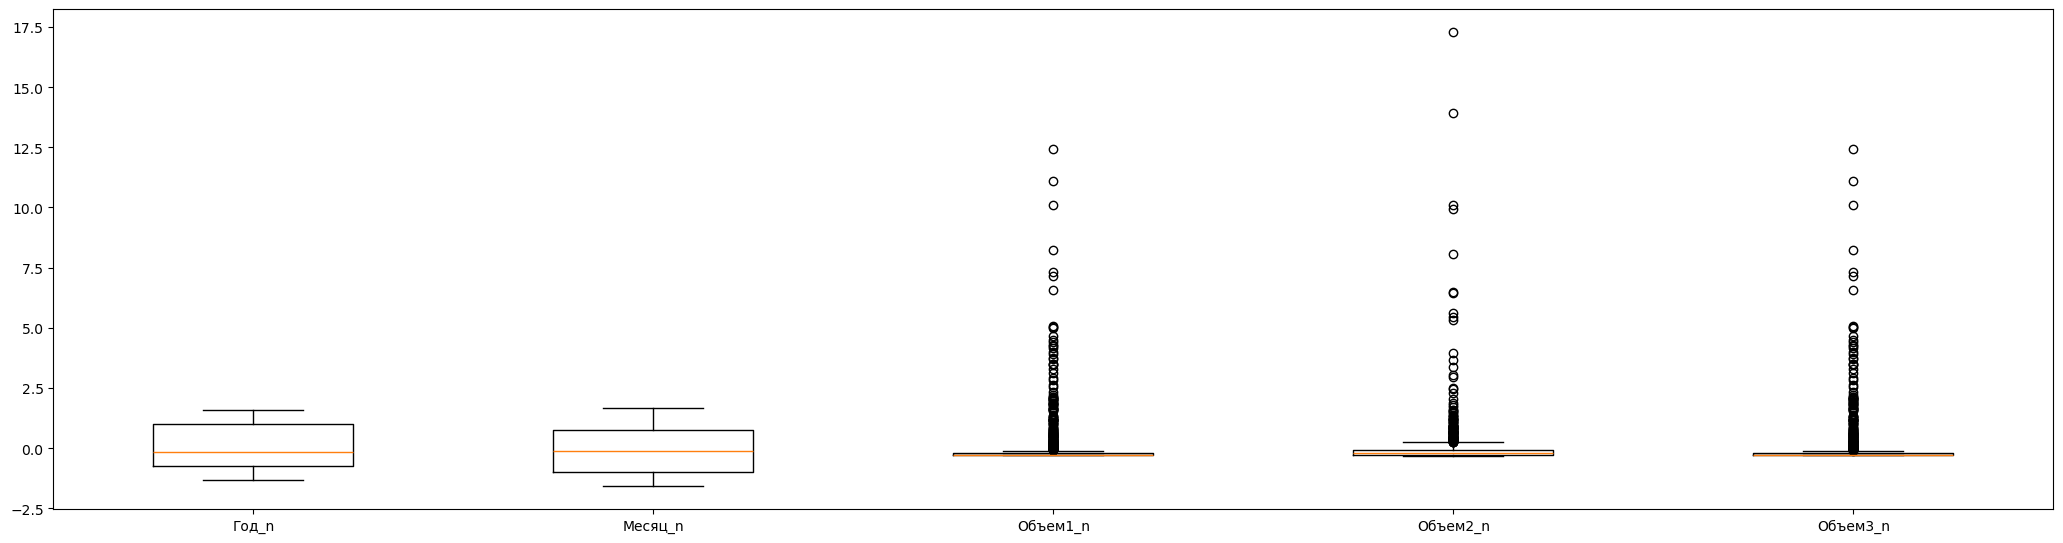

In [39]:
# визуализируем ящик с усами, чтобы оценить количество выбросов
fig = plt.figure(figsize =(20,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df1_std.columns)

data = []
for col in df1_std.columns:
    data.append(df1_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

In [41]:
# для каждого столбца, кроме столбцов год и месяц пропишем цикл, в котором значениям, выходящим за интерквартилный размах будет присваиваться NaN
for x in ['Объем1']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan
    

In [42]:
for x in ['Объем2']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [43]:
for x in ['Объем3']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [44]:
# но теперь появились нулевые значения, с которым проведём аналогичную работу
df1.isnull().sum()

Тип товара                         0
Полное наименование                0
МНН                                0
Лекарственная форма                0
Бренд                              0
Фирма_производитель                0
Корпорация                         0
Фармакотерапевтическая группа      0
АТС1                               0
АТС2                              67
АТС3                              67
АТС4                             145
АТС5                             223
Ephmra1                            0
Ephmra2                            0
Ephmra3                            0
Ephmra4                          493
Год                                0
Месяц                              0
Объем1                           162
Объем2                           105
Объем3                           162
dtype: int64

In [45]:
#заполняем образовавшиеся пропуски
df_num3 = df1.select_dtypes('float64')
imputer = KNNImputer(n_neighbors=5, weights='uniform') #создаем импьютер
imputer.fit(df_num3)
df_num3 = pd.DataFrame(imputer.transform(df_num3), index=df_num3.index, columns=df_num3.columns) #заполняем недостающие значения
df_num3

,Объем1,Объем2,Объем3
5,1.680293e+06,1451.000000,1.514144e+06
8,1.098529e+07,2157.000000,1.092749e+07
16,7.987144e+06,1801.000000,7.916028e+06
21,3.047094e+06,1855.000000,2.718345e+06
71,3.503465e+07,3929.000000,3.503465e+07
...,...,...,...
3258,2.073421e+07,16023.000000,1.852207e+07
3262,8.924070e+06,5253.824219,8.209261e+06
3264,8.924070e+06,5253.824219,8.209261e+06
3267,8.924070e+06,5253.824219,8.209261e+06


In [46]:
#перезапишем в рабочий датафейм
df1['Объем1']=df_num3['Объем1']
df1['Объем2']=df_num3['Объем2']
df1['Объем3']=df_num3['Объем3']

C:\Users\todie\AppData\Local\Temp\ipykernel_13956\205155323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Объем1']=df_num3['Объем1']
C:\Users\todie\AppData\Local\Temp\ipykernel_13956\205155323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Объем2']=df_num3['Объем2']
C:\Users\todie\AppData\Local\Temp\ipykernel_13956\205155323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [47]:
#проверка: нулевых значений больше нет (Цена в это число пока не должна входить, т к она создается в следующей строке)
df1.isnull().sum()

Тип товара                         0
Полное наименование                0
МНН                                0
Лекарственная форма                0
Бренд                              0
Фирма_производитель                0
Корпорация                         0
Фармакотерапевтическая группа      0
АТС1                               0
АТС2                              67
АТС3                              67
АТС4                             145
АТС5                             223
Ephmra1                            0
Ephmra2                            0
Ephmra3                            0
Ephmra4                          493
Год                                0
Месяц                              0
Объем1                             0
Объем2                             0
Объем3                             0
dtype: int64

In [48]:
# Создадим новый столбец "Цена", чтобы узнать стоимость препаратов, для этого в столбеце делим строки с Объем (цена опт.-уп.розн.), рубли на Объем (розница), упак.
df1['Цена'] = df1['Объем3']/df1['Объем2']
df1.head(5)

C:\Users\todie\AppData\Local\Temp\ipykernel_13956\3746418277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Цена'] = df1['Объем3']/df1['Объем2']


,Тип товара,Полное наименование,МНН,Лекарственная форма,Бренд,Фирма_производитель,Корпорация,Фармакотерапевтическая группа,АТС1,АТС2,...,Ephmra1,Ephmra2,Ephmra3,Ephmra4,Год,Месяц,Объем1,Объем2,Объем3,Цена
5,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2022,3,1680293.4,1451.0,1514144.0,1043.517574
8,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2020,3,10985287.0,2157.0,10927490.0,5066.059342
16,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2018,10,7987143.8,1801.0,7916028.2,4395.351582
21,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ЛЕМТРАДА КОНЦ-Т Д/ПРИГ-Я РАСТ Д/ИНФ 10 МГ/МЛ 1...,АЛЕМТУЗУМАБ,КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,ЛЕМТРАДА,GENZYME CORPORATION,SANOFI SA,СЕЛЕКТИВНЫЙ ИММУНОДЕПРЕССАНТ,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОДЕПРЕССАНТЫ (L04),...,ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ (L01),МОНОКЛОНАЛЬНОЕ АНТИТЕЛО ПРОТИВООПУХОЛЕВОЕ (L01G),NaN,2021,4,3047093.6,1855.0,2718345.0,1465.415094
71,ЛЕКАРСТВЕННЫЕ ПРЕПАРАТЫ,ГЛАТИРАТ РАСТ Д/П/К ВВЕД 20 МГ/МЛ 1 МЛ №28,ГЛАТИРАМЕРА АЦЕТАТ,РАСТВОР ДЛЯ ПОДКОЖНОГО ВВЕДЕНИЯ,ГЛАТИРАТ,Р-ФАРМ АО,Р-ФАРМ АО,ИММУНОМОДУЛИРУЮЩЕЕ СРЕДСТВО,ПРОТИВООПУХОЛЕВЫЕ ПРЕПАРАТЫ И ИММУНОМОДУЛЯТОРЫ...,ИММУНОМОДУЛЯТОРЫ (L03),...,ПРОТИВООПУХОЛЕВЫЕ И ИММУНОМОДУЛИРУЮЩИЕ СРЕДСТВ...,ИММУНОСТИМУЛЯТОРЫ (L03),ИММУНОСТИМУЛЯТОРЫ ИСКЛЮЧАЯ ИНТЕРФЕРОНЫ (L03A),"ПРОЧИЕ ИММУНОСТИМУЛИРУЮЩИЕ АГЕНТЫ, ИСКЛЮЧАЯ ИН...",2019,5,35034648.0,3929.0,35034648.0,8916.937643


In [49]:
# для каждого ценнового сегмента создадим новую колонку, в которую будем записывать соотвествует ли числовое значение данному сегменту
def check(col):
  res = []
  for i in col:
    if i < 1500:
      res.append('недостаток')
    elif i < 5000:
      res.append('входит')
    else:
      res.append('избыток')
  return res

df1.loc[:, 'Свыше_1500'] = check(df1['Цена'])

C:\Users\todie\AppData\Local\Temp\ipykernel_13956\3186817436.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'Свыше_1500'] = check(df1['Цена'])


In [50]:
df1['Свыше_1500'].value_counts()

Свыше_1500
недостаток    785
входит        239
избыток       105
Name: count, dtype: int64

In [51]:
def check(col):
  res = []
  for i in col:
    if i < 500:
      res.append('недостаток')
    elif i < 1500:
      res.append('входит')
    else:
      res.append('избыток')
  return res

df1.loc[:, 'размер_500до1500'] = check(df1['Цена'])

def check(col):
  res = []
  for i in col:
    if i < 1:
      res.append('недостаток')
    elif i < 500:
      res.append('входит')
    else:
      res.append('избыток')
  return res

df1.loc[:, 'до_500'] = check(df1['Цена'])

C:\Users\todie\AppData\Local\Temp\ipykernel_13956\1192706221.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'размер_500до1500'] = check(df1['Цена'])
C:\Users\todie\AppData\Local\Temp\ipykernel_13956\1192706221.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'до_500'] = check(df1['Цена'])


In [52]:
df1['размер_500до1500'].value_counts()

размер_500до1500
входит        707
избыток       344
недостаток     78
Name: count, dtype: int64

In [54]:
df1['до_500'].value_counts()

до_500
избыток    1051
входит       78
Name: count, dtype: int64

In [56]:
#Исследовательский анализ данных
def analyze_data(df1):
    print("\n Анализ данных \n")
# Анализ по Лекарственной формы
print("Лекарственная форма:")
print(df['Лекарственная форма'].value_counts().head())
print("\n")
# Анализ по Брендам
print("Распределение Брендов по упоминанию:")
print(df['Бренд'].value_counts())
print("\n")

# Анализ по МНН
print("Распределение по МНН:")
print(df['МНН'].value_counts())
print("\n")

# Анализ по годам
print("Топ годов:")
print(df['Год'].value_counts().head())

Лекарственная форма:
Лекарственная форма
РАСТВОР ДЛЯ ПОДКОЖНОГО ВВЕДЕНИЯ                                             684
РАСТВОР ДЛЯ ВНУТРИМЫШЕЧНОГО И ПОДКОЖНОГО ВВЕДЕНИЯ                           436
РАСТВОР ДЛЯ ИНЪЕКЦИЙ                                                        305
ЛИОФИЛИЗАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНЪЕКЦИЙ И МЕСТНОГО ПРИМЕНЕНИЯ    298
КОНЦЕНТРАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ                           269
Name: count, dtype: int64


Распределение Брендов по упоминанию:
Бренд
РЕАФЕРОН            491
ЛАЙФФЕРОН           423
АЛЬТЕВИР            280
АЛЬФАРОНА           174
НЕОВИР              156
НЕЙРОМИДИН          148
КОПАКСОН            146
АКСАМОН             144
ИПИГРИКС            144
РЕБИФ               132
ПЛЕГРИДИ             90
ИНФИБЕТА             81
ИНТЕРФЕРОН           75
ОКРЕВУС              67
БИННОФЕРОН АЛЬФА     67
ТИМЕКСОН             67
ИНТРОН               66
КЛАДРИБИН            59
ЛЕЙКЛАДИН            59
ТИЗАБРИ              57
ЛЕМТРАДА

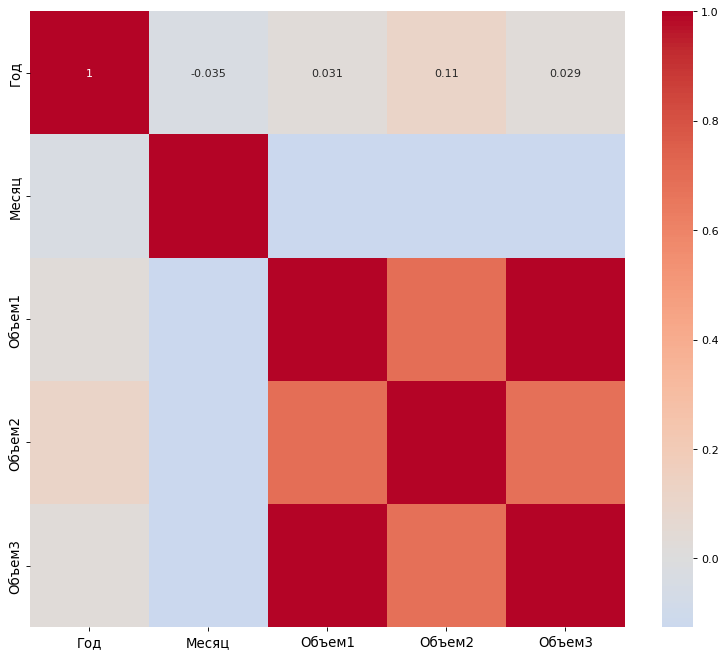

In [57]:
#Оформление дашборда
#посмотрим на корреляцию принаков между собой, возможно это поможет в дальнейшем анализе
plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(df1_num.corr(method='spearman'), xticklabels=df1_num.corr(method='spearman').columns, yticklabels=df1_num.corr(method='spearman').columns, cmap='coolwarm', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [59]:
def create_visualizations(df1):
    

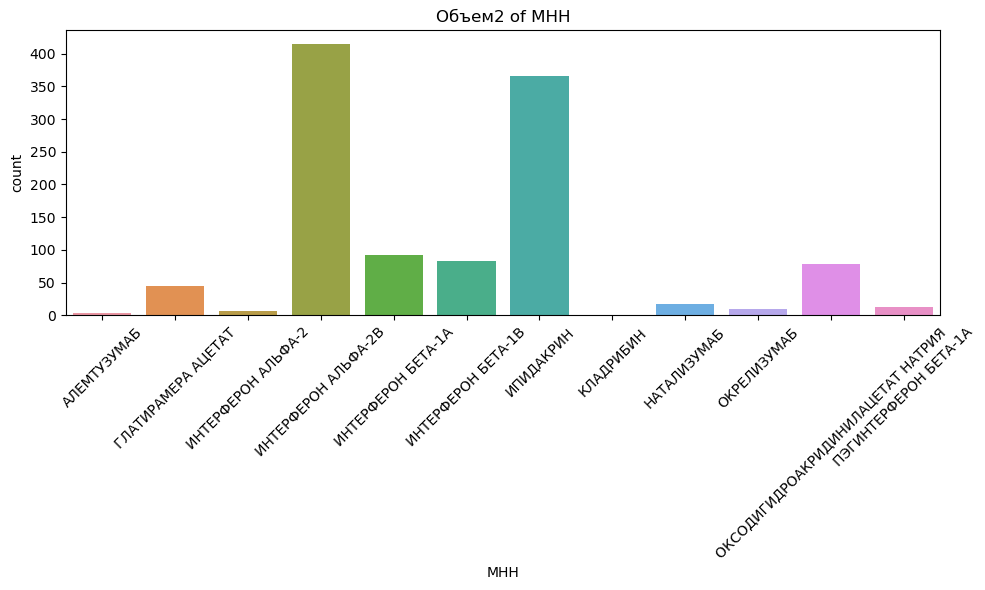

In [60]:
    # График 1: Распределение Объема (розница), упак. по  МНН
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df1, x='МНН')
    plt.xticks(rotation=45)
    plt.title('Объем2 of МНН')
    plt.tight_layout()
    plt.show()

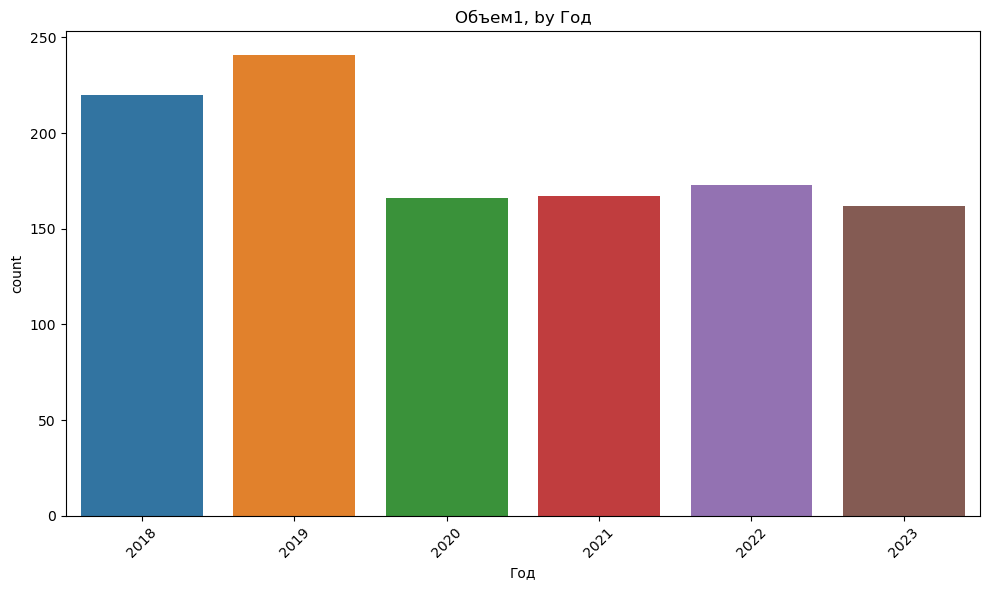

In [61]:
# График 2: Распределение упоминания Объем (цена опт.-уп.розн.), рубли по годам
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Год')
plt.xticks(rotation=45)
plt.title('Объем1, by Год')
plt.tight_layout()
plt.show()

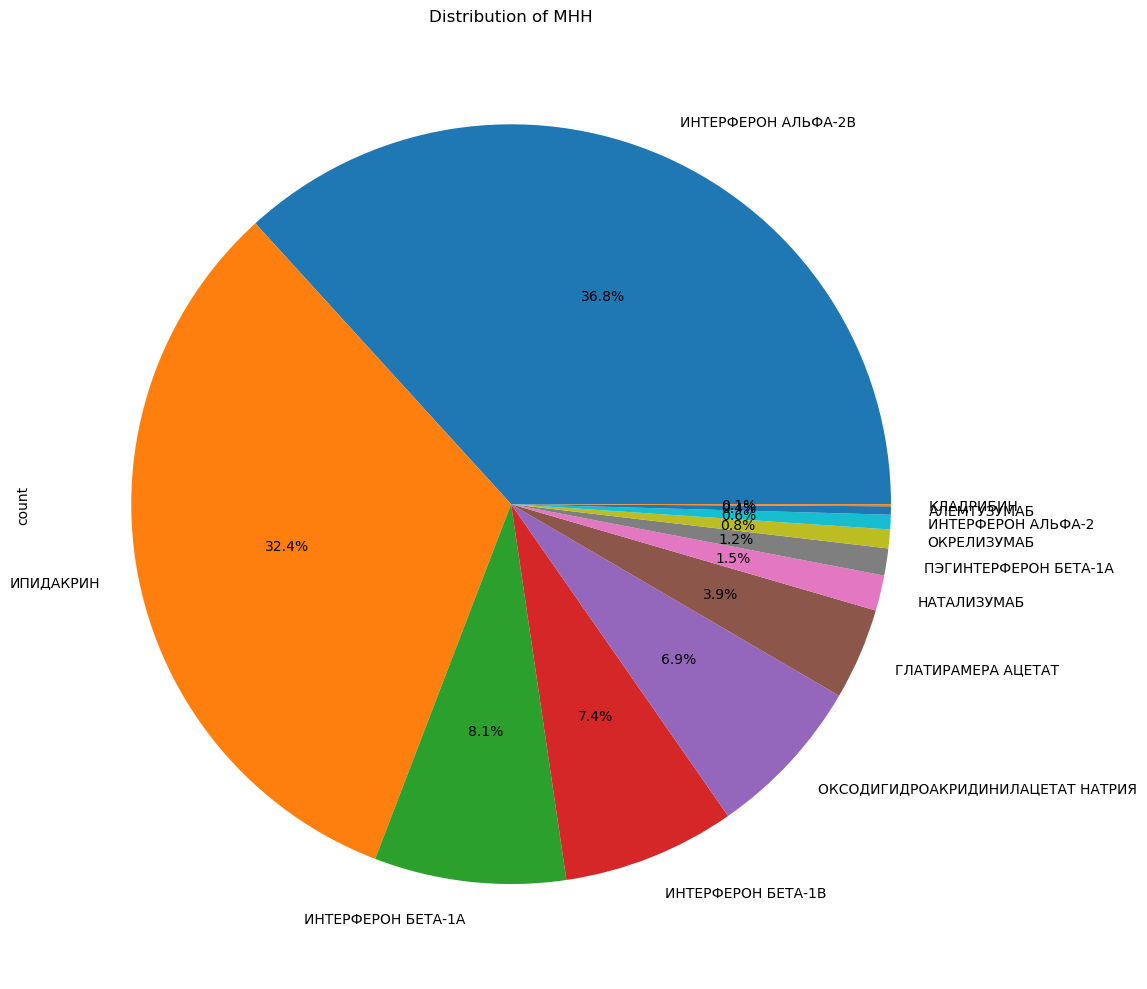

In [62]:
# График 3: Общая ависимость упоминания МНН
plt.figure(figsize=(12, 10))
df1['МНН'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of МНН')
plt.tight_layout()
plt.show()

In [103]:
def calculate_quality_metrics(df1):
    # Определите словарь metrics в функции
    metrics = {
        'total_rows': len(df1),
        'total_columns': len(df1.columns),
        'missing_values': df1.isnull().sum().to_dict(),
        'duplicates': len(df1) - len(df1.drop_duplicates()),
        'completeness': (1 - df1.isnull().sum() / len(df1)).to_dict(),
        'unique_values': df1.nunique().to_dict()
    }
    return metrics

metrics = calculate_quality_metrics(df1)
print(metrics)

{'total_rows': 1129, 'total_columns': 26, 'missing_values': {'Тип товара': 0, 'Полное наименование': 0, 'МНН': 0, 'Лекарственная форма': 0, 'Бренд': 0, 'Фирма_производитель': 0, 'Корпорация': 0, 'Фармакотерапевтическая группа': 0, 'АТС1': 0, 'АТС2': 67, 'АТС3': 67, 'АТС4': 145, 'АТС5': 223, 'Ephmra1': 0, 'Ephmra2': 0, 'Ephmra3': 0, 'Ephmra4': 493, 'Год': 0, 'Месяц': 0, 'Объем1': 0, 'Объем2': 0, 'Объем3': 0, 'Цена': 0, 'Свыше_1500': 0, 'размер_500до1500': 0, 'до_500': 0}, 'duplicates': 0, 'completeness': {'Тип товара': 1.0, 'Полное наименование': 1.0, 'МНН': 1.0, 'Лекарственная форма': 1.0, 'Бренд': 1.0, 'Фирма_производитель': 1.0, 'Корпорация': 1.0, 'Фармакотерапевтическая группа': 1.0, 'АТС1': 1.0, 'АТС2': 0.9406554472984943, 'АТС3': 0.9406554472984943, 'АТС4': 0.8715677590788309, 'АТС5': 0.8024800708591674, 'Ephmra1': 1.0, 'Ephmra2': 1.0, 'Ephmra3': 1.0, 'Ephmra4': 0.5633303808680248, 'Год': 1.0, 'Месяц': 1.0, 'Объем1': 1.0, 'Объем2': 1.0, 'Объем3': 1.0, 'Цена': 1.0, 'Свыше_1500': 1.

In [64]:
#Сохраняем измененный файл

In [65]:
df1.to_csv('Desktop/Новая папка/clean_data.csv', sep=';', encoding='utf-8-sig')

In [75]:
from csv import reader
# Установить соединение с базой данных
conn = sqlite3.connect('Desktop/Новая папка/clean_db.sqlite3')
c = conn.cursor()

 # Создаем таблицу analytics
c.execute( '''CREATE TABLE analy(
id INTEGER PRIMARY KEY AUTOINCREMENT,
Тип товара TEXT,
Полное наименование TEXT,
МНН TEXT,
Лекарственная форма TEXT,
Бренд TEXT,
Фирма_производитель TEXT,
Корпорация TEXT,
Фармакотерапевтическая группа TEXT,
АТС1 TEXT,
АТС2 TEXT,
АТС3 TEXT,
АТС4 TEXT,
АТС5 TEXT,
Ephmra1 TEXT,
Ephmra2 TEXT,
Ephmra3 TEXT,
Ephmra4 TEXT,
Год INTEGER,
Месяц INTEGER,
Объем1 INTEGER,
Объем2 INTEGER,
Объем3 INTEGER,
Cвыше_1500 TEXT,
размер_500до1500 TEXT,
до_500 TEXT,
Цена TEXT)''')

# Вставка данных в таблицу
data = []

with open('Desktop/Новая папка/clean_data.csv', encoding='utf-8') as f:
    read = reader(f, delimiter=';')
    read.__next__()
    for line in read:
        chunk = []
        chunk.append(line[1])
        chunk.append(line[2])
        chunk.append(line[3])
        chunk.append(line[4])
        chunk.append(line[5])
        chunk.append(line[6])
        chunk.append(line[7])
        chunk.append(line[8])
        chunk.append(line[9])
        chunk.append(line[10])
        chunk.append(line[11])
        chunk.append(line[12])
        chunk.append(line[13])
        chunk.append(line[14])
        chunk.append(line[15])
        chunk.append(line[16])
        chunk.append(line[17])
        chunk.append(int(line[18]))
        chunk.append(float(line[19]))
        chunk.append(float(line[20]))
        chunk.append(float(line[21]))
        chunk.append(float(line[22]))
        chunk.append(line[23])
        chunk.append(line[24])
        chunk.append(line[25])
        chunk.append(line[26])
        data.append(chunk)

with conn:
    c.executemany(
        '''
        INSERT INTO analytics VALUES(null, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''',
        data
    )